In [98]:
import os
import urllib.request
import tarfile
import pandas as pd
import numpy as np
from pathlib import Path
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [18]:
def download_data(url, local_path, file_name):
    Path(local_path).mkdir(parents=True, exist_ok=True)
    local_file = os.path.join(local_path, file_name) 
    urllib.request.urlretrieve(url, local_file)
    data_file = tarfile.open(local_file)
    data_file.extractall(path=local_path)
    data_file.close()
    
def load_data(path, file_name):
    file_path = os.path.join(path, file_name)
    dataset = pd.read_csv(file_path)
    
    return dataset

In [13]:
download_data(HOUSING_URL, HOUSING_PATH, "housing.tgz")

In [19]:
housing = load_data(HOUSING_PATH, "housing.csv")

In [20]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [21]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [22]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [23]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


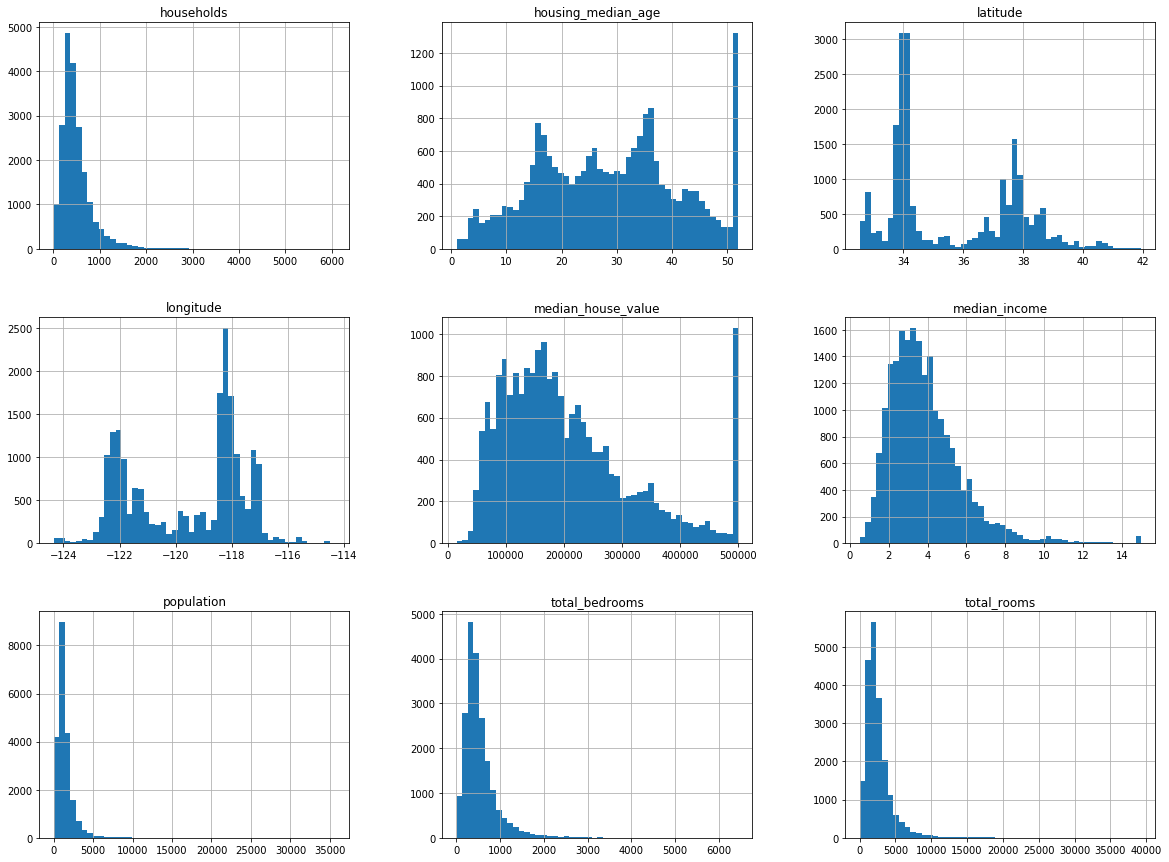

In [25]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [29]:
int(20640 * 0.2)

4128

In [41]:
def train_test_split(dataset, test_ratio):
    len_dataset = len(dataset.index)
    test_amount = int(len_dataset * test_ratio)
    
    np.random.seed(12)
    randomness = np.random.permutation(len_dataset)
    
    train_indices = randomness[test_amount:]
    test_indices = randomness[:test_amount]
    
    return dataset.iloc[train_indices], dataset.iloc[test_indices]

In [42]:
train, test = train_test_split(housing, 0.2)

In [44]:
housing["income_cat"] = pd.cut(housing["median_income"], 
       bins=[0, 1.5, 3, 4.5, 6, np.inf],
       labels=[1, 2, 3, 4, 5])

In [45]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


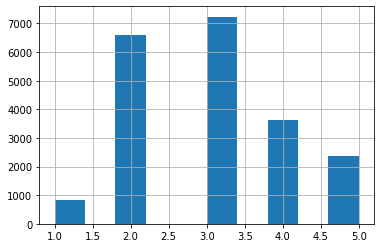

In [46]:
housing["income_cat"].hist()

In [52]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train = housing.loc[train_index]
    strat_test = housing.loc[test_index]
    
    

In [54]:
strat_test["income_cat"].value_counts() / len(strat_test)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [55]:
for set_ in (strat_train, strat_test):
     set_.drop("income_cat", axis=1, inplace=True)


In [56]:
strat_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5288,-118.47,34.05,27.0,4401.0,1033.0,1725.0,962.0,4.1750,500001.0,<1H OCEAN
12865,-121.34,38.69,17.0,1968.0,364.0,996.0,331.0,3.7031,114300.0,INLAND
9174,-118.52,34.39,21.0,5477.0,1275.0,3384.0,1222.0,3.6625,228100.0,<1H OCEAN
17247,-119.70,34.43,52.0,1364.0,460.0,804.0,400.0,2.3750,293800.0,<1H OCEAN
14138,-117.07,32.74,37.0,1042.0,205.0,589.0,208.0,2.6629,116900.0,NEAR OCEAN


In [73]:
housing = strat_train.copy()

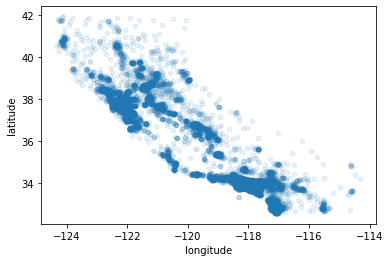

In [74]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

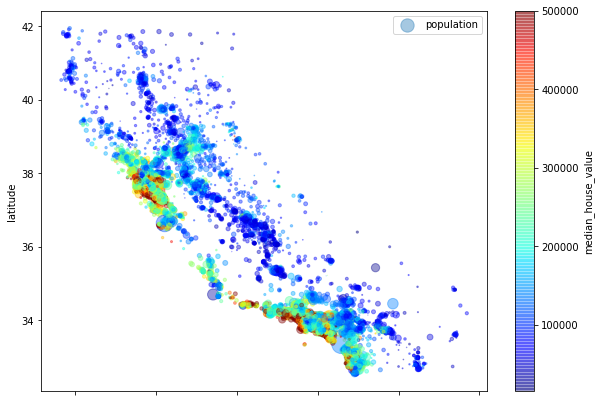

In [75]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()


In [76]:
corr_matrix = housing.corr()

In [77]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687014
total_rooms           0.139801
housing_median_age    0.098433
households            0.069613
total_bedrooms        0.054374
population           -0.021903
longitude            -0.043442
latitude             -0.144854
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B73393708>,
      dtype=object)

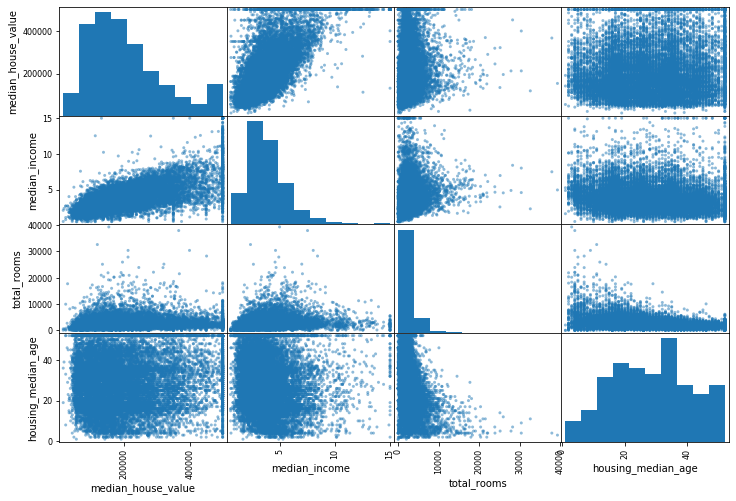

In [78]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))

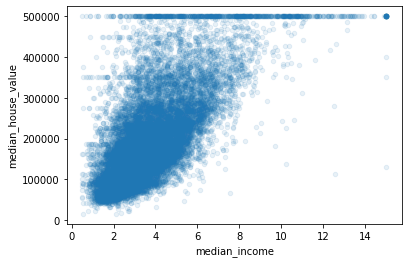

In [79]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)


In [80]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 5288 to 18453
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16348 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [81]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]


In [82]:
corr_matrix = housing.corr()

In [83]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687014
rooms_per_household         0.154133
total_rooms                 0.139801
housing_median_age          0.098433
households                  0.069613
total_bedrooms              0.054374
population                 -0.021903
population_per_household   -0.027443
longitude                  -0.043442
latitude                   -0.144854
bedrooms_per_room          -0.256332
Name: median_house_value, dtype: float64

In [84]:
housing = strat_train.drop("median_house_value", axis=1)
housing_labels = strat_train["median_house_value"].copy()

In [85]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 5288 to 18453
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16348 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [91]:
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [92]:
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2123.5   ,  434.    , 1166.    ,
        409.    ,    3.5341])

In [93]:
housing_num.median().values

array([-118.49  ,   34.26  ,   29.    , 2123.5   ,  434.    , 1166.    ,
        409.    ,    3.5341])

In [94]:
X = imputer.transform(housing_num)

In [105]:
housing_cat = housing[["ocean_proximity"]]

In [106]:
housing_cat.head(10)

,ocean_proximity
5288,<1H OCEAN
12865,INLAND
9174,<1H OCEAN
17247,<1H OCEAN
14138,NEAR OCEAN
5722,<1H OCEAN
18559,NEAR OCEAN
18488,INLAND
9796,NEAR OCEAN
19705,INLAND


In [111]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [113]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [116]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 5288 to 18453
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16348 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [115]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
    bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


In [118]:
housing_extra_attribs[:]

array([[-118.47, 34.05, 27.0, ..., '<1H OCEAN', 4.574844074844075,
        1.793139293139293],
       [-121.34, 38.69, 17.0, ..., 'INLAND', 5.945619335347432,
        3.009063444108761],
       [-118.52, 34.39, 21.0, ..., '<1H OCEAN', 4.481996726677577,
        2.769230769230769],
       ...,
       [-118.27, 33.94, 43.0, ..., '<1H OCEAN', 3.85, 3.476470588235294],
       [-122.21, 37.78, 43.0, ..., 'NEAR BAY', 4.181818181818182,
        3.0147420147420148],
       [-121.78, 37.22, 18.0, ..., '<1H OCEAN', 5.291044776119403,
        3.8482587064676617]], dtype=object)

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [121]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [124]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [132]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

predict = lin_reg.predict(some_data_prepared)
print(list(zip(predict, some_labels)))
mae = np.sum(np.abs(predict - some_labels)) / len(some_labels)
print("MAE: ", mae)
rmse = np.sqrt(np.sum(np.abs(np.square(predict - some_labels))) / len(some_labels))
print("RMSE: ", rmse)


[(289969.5064051588, 500001.0), (121237.63448993169, 114300.0), (221892.16467180062, 228100.0), (248043.6061229207, 293800.0), (181941.24496149324, 116900.0)]
MAE:  66794.92045030897
RMSE:  100522.5421686431


In [145]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE: ", lin_rmse)

mae = np.sum(np.abs(housing_predictions - housing_labels)) / len(housing_labels)
print("MAE: ", mae)
rmse = np.sqrt(np.sum(np.square(housing_predictions - housing_labels)) / len(housing_labels))
print("RMSE: ", rmse)



RMSE:  68144.20403630973
MAE:  49169.55008806198
RMSE:  68144.20403630973


In [134]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [146]:
housing_predictions = tree.predict(housing_prepared)

mae = np.sum(np.abs(housing_predictions - housing_labels)) / len(housing_labels)
print("MAE: ", mae)
rmse = np.sqrt(np.sum(np.square(housing_predictions - housing_labels)) / len(housing_labels))
print("RMSE: ", rmse)

MAE:  0.0
RMSE:  0.0


In [147]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [148]:
tree_rmse_scores = np.sqrt(-scores)

In [149]:
print(f"Scores: {tree_rmse_scores}")
print(f"Mean: {tree_rmse_scores.mean()}")
print(f"Std: {tree_rmse_scores.std()}")

Scores: [71996.8030795  72700.99205519 67524.24041068 66106.82187587
 72350.09571111 69396.56062842 67635.63038039 71241.34918681
 66792.04264301 71264.08268185]
Mean: 69700.86186528257
Std: 2378.6790807833886


In [150]:
mean = np.sum(tree_rmse_scores) / len(tree_rmse_scores)
std = np.sqrt(np.sum((tree_rmse_scores - mean) ** 2) / len(tree_rmse_scores))

print(mean, std)

69700.86186528257 2378.6790807833886


In [151]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-scores)

In [152]:
print(f"Scores: {lin_reg_rmse_scores}")
print(f"Mean: {lin_reg_rmse_scores.mean()}")
print(f"Std: {lin_reg_rmse_scores.std()}")

Scores: [66236.07150599 71351.82289977 67726.49972246 67722.85181465
 75025.93826873 69679.28471806 68342.50245934 65409.55141324
 65140.25129467 67647.53570989]
Mean: 68428.23098068067
Std: 2828.036201020026


In [163]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(housing_prepared, housing_labels)

cross_val_score(forest, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [164]:
print(f"Scores: {forest_rmse_scores}")
print(f"Mean: {forest_rmse_scores.mean()}")
print(f"Std: {forest_rmse_scores.std()}")

Scores: [66236.07150599 71351.82289977 67726.49972246 67722.85181465
 75025.93826873 69679.28471806 68342.50245934 65409.55141324
 65140.25129467 67647.53570989]
Mean: 68428.23098068067
Std: 2828.036201020026


In [165]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [172]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [173]:
grid_search.cv_results_

{'mean_fit_time': array([0.0622478 , 0.18783722, 0.5814136 , 0.08794136, 0.34047794,
        1.02640362, 0.15364146, 0.42280421, 1.39614668, 0.17566996,
        0.56614556, 1.56573801, 0.09060221, 0.34549818, 0.11916852,
        0.39797931, 0.15045447, 0.50015841]),
 'std_fit_time': array([0.01219232, 0.00892236, 0.01342786, 0.00734317, 0.02189978,
        0.07487878, 0.01197591, 0.011481  , 0.09701987, 0.00990994,
        0.03852195, 0.00492912, 0.00624826, 0.03453306, 0.00713942,
        0.00562758, 0.00760779, 0.01173124]),
 'mean_score_time': array([0.00745254, 0.01281652, 0.0192276 , 0.00412827, 0.00418301,
        0.02760324, 0.00238085, 0.00312438, 0.02664862, 0.00492101,
        0.00731091, 0.03124762, 0.00312371, 0.01122355, 0.003124  ,
        0.00625067, 0.00313249, 0.00872827]),
 'std_score_time': array([6.77308513e-03, 6.43788632e-03, 6.08057388e-03, 6.06472213e-03,
        5.13219814e-03, 4.55745642e-03, 2.04378007e-03, 6.24876022e-03,
        6.51849112e-03, 5.47501995e-

In [169]:
grid_search.best_score_
best_rmse_scores = np.sqrt(-grid_search.best_score_)

In [170]:
print(f"Scores: {best_rmse_scores}")

Scores: 49474.84202079525
Mean: 49474.84202079525
Std: 0.0


In [174]:
grid_search.best_estimator_.feature_importances_

array([6.43403967e-02, 5.76365877e-02, 4.65774570e-02, 1.47894588e-02,
       1.52181110e-02, 1.57261940e-02, 1.37788325e-02, 3.94057414e-01,
       4.42299914e-02, 1.14471327e-01, 6.29372752e-02, 6.81386840e-03,
       1.41739314e-01, 2.05412420e-04, 2.81812861e-03, 4.66023037e-03])

In [181]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
list(sorted(zip(grid_search.best_estimator_.feature_importances_, attributes), reverse=True))

[(0.39405741427394825, 'median_income'),
 (0.14173931445498242, 'INLAND'),
 (0.11447132721182865, 'pop_per_hhold'),
 (0.0643403967394373, 'longitude'),
 (0.06293727516474053, 'bedrooms_per_room'),
 (0.05763658765667331, 'latitude'),
 (0.04657745704283997, 'housing_median_age'),
 (0.04422999137931702, 'rooms_per_hhold'),
 (0.01572619398236426, 'population'),
 (0.015218110970672749, 'total_bedrooms'),
 (0.0147894588384351, 'total_rooms'),
 (0.013778832482201455, 'households'),
 (0.006813868396236377, '<1H OCEAN'),
 (0.00466023037399224, 'NEAR OCEAN'),
 (0.0028181286126519266, 'NEAR BAY'),
 (0.00020541241967846237, 'ISLAND')]

In [184]:
final_model = grid_search.best_estimator_
X_test = strat_test.drop("median_house_value", axis=1)
y_test = strat_test["median_house_value"].copy()

X_test = full_pipeline.transform(X_test)

In [186]:
predict = final_model.predict(X_test)

mae = np.sum(np.abs(predict - y_test)) / len(y_test)
print(mae)

rmse = np.sqrt(np.sum(np.square(predict - y_test)) / len(y_test))
print(rmse)

33125.3984496124
50236.59380459856


In [187]:
from sklearn.svm import SVR

svr_reg = SVR()
svr_reg.fit(housing_prepared, housing_labels)

C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [188]:
predict = svr_reg.predict(X_test)
mae = np.sum(np.abs(predict - y_test)) / len(y_test)
print(mae)

rmse = np.sqrt(np.sum(np.square(predict - y_test)) / len(y_test))
print(rmse)

88950.1811908376
118525.81673379787


In [195]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
    {'C': [1, 2, 3], 'kernel': ["rbf", "linear"], 'gamma': ["scale", "auto"]}
]

svr_reg = SVR()
distributions = dict(C= [1, 2, 3],
                     kernel= ["rbf", "linear"],
                    )

clf = RandomizedSearchCV(svr_reg, distributions, random_state=0)

# grid_search = RandomizedSearchCV(svr_reg, param_grid, cv=5,
# scoring='neg_mean_squared_error',
# return_train_score=True)

clf.fit(housing_prepared, housing_labels)

C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma wi

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [1, 2, 3],
                                        'kernel': ['rbf', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=0, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [196]:
best_svr = clf.best_estimator_

In [197]:
predict = best_svr.predict(X_test)
mae = np.sum(np.abs(predict - y_test)) / len(y_test)
print(mae)

rmse = np.sqrt(np.sum(np.square(predict - y_test)) / len(y_test))
print(rmse)

73210.99144847375
99904.70356906884


In [251]:
class FeaturesSelector(BaseEstimator, TransformerMixin):
    def __init__(self, forest, num_features):
        self.forest = forest
        self.num_features = num_features
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        print(self.forest.feature_importances_)
        print(len(self.forest.feature_importances_))
        print(X.shape)
        
        all_importances = pd.DataFrame(self.forest.feature_importances_, columns=["Importances"])
#         print(all_importances)
        importances = all_importances.sort_values(by=["Importances"], ascending=False)[:self.num_features]
        print(importances.index.values)
        print(X)
        return np.take(X, importances.index.values, axis = 1)
    
FeaturesSelector(forest, 5).transform(housing_prepared)

[5.90821607e-02 5.46737265e-02 4.43409140e-02 1.29630478e-02
 1.20252622e-02 1.30704249e-02 1.01020535e-02 4.78484153e-01
 2.72499199e-02 1.22521646e-01 2.20485927e-02 1.29597392e-03
 1.38013937e-01 1.06331528e-04 1.57182481e-03 2.45003206e-03]
16
(16512, 16)
[ 7 12  9  0  1]
[[ 0.54897458 -0.74027358 -0.13156762 ...  0.          0.
   0.        ]
 [-0.88297552  1.4315849  -0.92675229 ...  0.          0.
   0.        ]
 [ 0.52402771 -0.58112878 -0.60867842 ...  0.          0.
   0.        ]
 ...
 [ 0.64876204 -0.79176161  1.14072785 ...  0.          0.
   0.        ]
 [-1.31705098  1.00563852  1.14072785 ...  0.          1.
   0.        ]
 [-1.10250794  0.74351767 -0.84723382 ...  0.          0.
   0.        ]]


array([[ 0.1574345 ,  0.        , -0.1165511 ,  0.54897458, -0.74027358],
       [-0.08913229,  1.        , -0.00519533, -0.88297552,  1.4315849 ],
       [-0.1103457 ,  0.        , -0.02715949,  0.52402771, -0.58112878],
       ...,
       [-1.1553416 ,  0.        ,  0.03761036,  0.64876204, -0.79176161],
       [-1.12592496,  0.        , -0.00467528, -1.31705098,  1.00563852],
       [ 0.63855061,  0.        ,  0.07165916, -1.10250794,  0.74351767]])

In [259]:
print(forest.feature_importances_)

final_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('features', FeaturesSelector(forest, 5)),
    ('train', RandomForestRegressor()),
])

test = final_pipeline.fit(housing, housing_labels)


predict = test.predict(housing)
np.sqrt(np.sum(np.square(predict - housing_labels)) / len(predict))

[5.90821607e-02 5.46737265e-02 4.43409140e-02 1.29630478e-02
 1.20252622e-02 1.30704249e-02 1.01020535e-02 4.78484153e-01
 2.72499199e-02 1.22521646e-01 2.20485927e-02 1.29597392e-03
 1.38013937e-01 1.06331528e-04 1.57182481e-03 2.45003206e-03]
[5.90821607e-02 5.46737265e-02 4.43409140e-02 1.29630478e-02
 1.20252622e-02 1.30704249e-02 1.01020535e-02 4.78484153e-01
 2.72499199e-02 1.22521646e-01 2.20485927e-02 1.29597392e-03
 1.38013937e-01 1.06331528e-04 1.57182481e-03 2.45003206e-03]
16
(16512, 16)
[ 7 12  9  0  1]
[[ 0.54897458 -0.74027358 -0.13156762 ...  0.          0.
   0.        ]
 [-0.88297552  1.4315849  -0.92675229 ...  0.          0.
   0.        ]
 [ 0.52402771 -0.58112878 -0.60867842 ...  0.          0.
   0.        ]
 ...
 [ 0.64876204 -0.79176161  1.14072785 ...  0.          0.
   0.        ]
 [-1.31705098  1.00563852  1.14072785 ...  0.          1.
   0.        ]
 [-1.10250794  0.74351767 -0.84723382 ...  0.          0.
   0.        ]]


C:\Users\ihate\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[5.90821607e-02 5.46737265e-02 4.43409140e-02 1.29630478e-02
 1.20252622e-02 1.30704249e-02 1.01020535e-02 4.78484153e-01
 2.72499199e-02 1.22521646e-01 2.20485927e-02 1.29597392e-03
 1.38013937e-01 1.06331528e-04 1.57182481e-03 2.45003206e-03]
16
(16512, 16)
[ 7 12  9  0  1]
[[ 0.54897458 -0.74027358 -0.13156762 ...  0.          0.
   0.        ]
 [-0.88297552  1.4315849  -0.92675229 ...  0.          0.
   0.        ]
 [ 0.52402771 -0.58112878 -0.60867842 ...  0.          0.
   0.        ]
 ...
 [ 0.64876204 -0.79176161  1.14072785 ...  0.          0.
   0.        ]
 [-1.31705098  1.00563852  1.14072785 ...  0.          1.
   0.        ]
 [-1.10250794  0.74351767 -0.84723382 ...  0.          0.
   0.        ]]


22126.63981815146